In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('tough_dataset.csv')
dataset.reset_index(drop=True,inplace=True)
xtrain1=dataset.drop(columns=['Target A','Target B'],axis=1)
ytrain1=dataset[['Target A','Target B']]

In [3]:
xtrain,xtest,ytrain,ytest=train_test_split(xtrain1,ytrain1,test_size=0.2,random_state=121)

In [4]:
train_df=pd.concat([xtrain,ytrain],axis=1)
test_df=pd.concat([xtest,ytest],axis=1)

In [5]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

In [6]:
train_df.head()

,id,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,...,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Target A,Target B
0,68385901,20000,Executive Program Director,ADMINISTRATIVE CONSTRUCTION PR,Infra-Executive,"The NYC Department of Design and Construction,...",At least six years of full-time satisfactory e...,Candidates should possess at least 10 years of...,NaN,"For City Employees, please go to Employee Self...",...,151xx,PA,24.78,Jul-99,16-May,19915.18,NaN,19-Mar,69940.0,0
1,68356094,28000,Investigator,CONFIDENTIAL INVESTIGATOR,Background Investigation,The New York City Department of Investigation ...,1. A four-year high school diploma or its educ...,"·\tStrong writing and editing skills, includin...",NaN,The City of New York is an equal opportunity e...,...,672xx,KS,11.36,Sep-98,18-Aug,850.42,NaN,18-Oct,43799.0,1
2,68338594,24000,CONTRACT ADMINISTRATOR,PROCUREMENT ANALYST,Administration/Procurement,Only those applicants with permanent civil ser...,1. A baccalaureate degree from an accredited c...,The selected candidate must have working knowl...,DEP is an equal opportunity employer with a st...,"Click on the ""Apply Now"" Button",...,773xx,TX,35.70,Jul-98,16-Sep,417.35,NaN,18-Jul,47450.0,0
3,67890239,28000,Forensic Mortuary Technician I,FORENSIC MORTUARY TECHNICIAN,OCME-Operations,The Office of Chief Medical Examiner investiga...,1. A four year high school diploma or its educ...,NaN,LICENSE REQUIREMENT 1.\tA motor vehicle driver...,"TO APPLY, PLEASE SUBMIT RESUME AND COVER LETTE...",...,760xx,TX,19.60,3-Dec,17-May,574.33,NaN,17-Sep,40899.0,0
4,67326377,16000,Principal Administrative Associate II,PRINCIPAL ADMINISTRATIVE ASSOC,Human Resources,New York City is home to approximately 1.64 mi...,1. A baccalaureate degree from an accredited c...,"Knowledge of PMS, NYCAPS, CHRMS, City Time and...",In order to be considered for the position can...,Please be sure to submit a resume & cover lett...,...,554xx,MN,10.32,May-96,17-May,9860.36,NaN,19-Mar,49390.0,1


<h1>EDA and Preprocessing

In [7]:
train_df.isnull().sum().sum()

28802

<H3>Remove feature with more than 80% of missing data

In [8]:
train_df=train_df.drop(columns=['next_pymnt_d','TimeAfterBootcamp','HackathonReasons'],axis=1)
test_df=test_df.drop(columns=['next_pymnt_d','TimeAfterBootcamp','HackathonReasons'],axis=1)

In [9]:
numerical_features=train_df.select_dtypes(include=np.number)
categorical_features=train_df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (2356, 6) Index(['id', 'LOAN_AMT', 'dti', 'last_pymnt_amnt', 'Target A', 'Target B'], dtype='object')
categorical_features:  (2356, 60) Index(['Business Title', 'Civil Service Title', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'AgreeDisagree1', 'AgreeDisagree2', 'AgreeDisagree3',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE'

In [10]:
df_train=train_df.copy()
df_test=test_df.copy()

In [11]:
df_train['Posting Date']=pd.to_datetime(df_train['Posting Date'])
df_train['Posting Updated']=pd.to_datetime(df_train['Posting Updated'])
df_train['Process Date']=pd.to_datetime(df_train['Process Date'])

In [12]:
df_test['Posting Date']=pd.to_datetime(df_test['Posting Date'])
df_test['Posting Updated']=pd.to_datetime(df_test['Posting Updated'])
df_test['Process Date']=pd.to_datetime(df_test['Process Date'])

In [13]:
df_train['pymnt_plan'].nunique()

1

<h3>we can remove pymnt_plan because it is a constant feature

In [14]:
df_train=df_train.drop(['pymnt_plan'],axis=1)
df_test=df_test.drop(['pymnt_plan'],axis=1)

df_train.shape,df_test.shape

((2356, 65), (590, 65))

In [15]:
print(df_train['url'][0])
qcut=df_train['url'].str.split('?').str.get(0)
print(qcut[0])
print(qcut.nunique())

https://lendingclub.com/browse/loanDetail.action?loan_id=68385901
https://lendingclub.com/browse/loanDetail.action
1


<h3>Since Url is a constant featurewe can  remove it

In [16]:
df_train=df_train.drop(['url'],axis=1)
df_test=df_test.drop(['url'],axis=1)

df_train.shape,df_test.shape

((2356, 64), (590, 64))

<h3>here we will divide categorical features into two part one set is of features containing categories and second set is text based feature

In [17]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for Business Title 1158
Value Counts for Business Title 
 Assistant Civil Engineer                         26
Project Manager                                  23
College Aide                                     21
Construction Project Manager                     16
Investigator                                     15
                                                 ..
Risk Management Supervisor                        1
Plant Chief                                       1
Payroll Supervisor                                1
Senior Developer, MO for Economic Opportunity     1
Dynamics Developer                                1
Name: Business Title, Length: 1158, dtype: int64 

Total unique values for Civil Service Title 301
Value Counts for Civil Service Title 
 COMMUNITY COORDINATOR             147
AGENCY ATTORNEY                    92
CIVIL ENGINEER                     67
CITY RESEARCH SCIENTIST            63
CLERICAL ASSOCIATE                 59
                      


Total unique values for AIResponsible 5
Value Counts for AIResponsible 
 The developers or the people creating the AI    798
A governmental or other regulatory body         476
Prominent industry leaders                      253
Nobody                                          126
Name: AIResponsible, dtype: int64 

Total unique values for AIFuture 4
Value Counts for AIFuture 
 I'm excited about the possibilities more than worried about the dangers.        1280
I'm worried about the dangers more than I'm excited about the possibilities.     317
I don't care about it, or I haven't thought about it.                            153
Name: AIFuture, dtype: int64 

Total unique values for Age 7
Value Counts for Age 
 25 - 34 years old     890
18 - 24 years old     327
35 - 44 years old     286
45 - 54 years old      80
55 - 64 years old      19
Under 18 years old      7
Name: Age, dtype: int64 

Total unique values for term 2
Value Counts for term 
  36 months    1638
 60 months     718
Name:

<h1>Before here finish the preprocessing that is after td-idf

<h3>We can build a quick classifier like knn and fill the missing values but Since we are having a lot of features and a lot missing values better we fill them with n/a

<h3>Business Title

In [18]:
df_train['Business Title']=df_train['Business Title'].str.lower()
df_test['Business Title']=df_test['Business Title'].str.lower()
yyyy=df_train['Business Title'].unique()
xxx=df_test['Business Title'].unique()
diff=[]
a=False
count=0
for i in range(len(xxx)):
    for j in range(len(yyyy)):
        if xxx[i]==yyyy[j]:
            a=True
    if a==False:
        diff.append(xxx[i])
        count+=1
    a=False
print(count)    

84


<h3>since the unique categories in train and are different we can remove those columns or else we can use Laplace smoothing or additive smoothing

In [19]:
df_frequency_map=(((df_train['Business Title'].value_counts())+1)/(len(df_train)+len(df_train['Business Title']))).to_dict()
df_frequency_map2=(((df_test['Business Title'].value_counts())+1)/(len(df_test)+len(df_test['Business Title']))).to_dict()

df_train['Business Title'] = df_train['Business Title'].map(df_frequency_map)
df_test['Business Title'] = df_test['Business Title'].map(df_frequency_map2)

<h3>Civil service title

In [20]:
df_train['Civil Service Title']=df_train['Civil Service Title'].str.lower()
df_test['Civil Service Title']=df_test['Civil Service Title'].str.lower()
yyyy=df_train['Civil Service Title'].unique()
xxx=df_test['Civil Service Title'].unique()
diff=[]
a=False
count=0
for i in range(len(xxx)):
    for j in range(len(yyyy)):
        if xxx[i]==yyyy[j]:
            a=True
    if a==False:
        diff.append(xxx[i])
        count+=1
    a=False
print(count)    

11


In [21]:
df_frequency_map=(((df_train['Civil Service Title'].value_counts())+1)/(len(df_train)+len(df_train['Civil Service Title']))).to_dict()
df_frequency_map2=(((df_test['Civil Service Title'].value_counts())+1)/(len(df_test)+len(df_test['Civil Service Title']))).to_dict()

df_train['Civil Service Title'] = df_train['Civil Service Title'].map(df_frequency_map)
df_test['Civil Service Title'] = df_test['Civil Service Title'].map(df_frequency_map2)

<h3>Division/Work Unit

In [22]:
df_train['Division/Work Unit']=df_train['Division/Work Unit'].str.lower()
df_test['Division/Work Unit']=df_test['Division/Work Unit'].str.lower()
yyyy=df_train['Division/Work Unit'].unique()
xxx=df_test['Division/Work Unit'].unique()
diff=[]
a=False
count=0
for i in range(len(xxx)):
    for j in range(len(yyyy)):
        if xxx[i]==yyyy[j]:
            a=True
    if a==False:
        diff.append(xxx[i])
        count+=1
    a=False
print(count)    

42


In [23]:
df_frequency_map=(((df_train['Division/Work Unit'].value_counts())+1)/(len(df_train)+len(df_train['Division/Work Unit']))).to_dict()
df_frequency_map2=(((df_test['Division/Work Unit'].value_counts())+1)/(len(df_test)+len(df_test['Division/Work Unit']))).to_dict()

df_train['Division/Work Unit'] = df_train['Division/Work Unit'].map(df_frequency_map)
df_test['Division/Work Unit'] = df_test['Division/Work Unit'].map(df_frequency_map2)

<h3>Formal education,undergradmajor,companysize,yearscoding,yearscodingprof

In [24]:
mapper1={'Bachelor�s degree (BA, BS, B.Eng., etc.)':'BD',
       'Master�s degree (MA, MS, M.Eng., MBA, etc.)':'MD',
       'Some college/university study without earning a degree':'CU',
       'Professional degree (JD, MD, etc.)':'PD',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'SS',
       'Other doctoral degree (Ph.D, Ed.D., etc.)':'DD', 
       'Associate degree':'AD', 'I never completed any formal education':'NO',
       'Primary/elementary school':'PE'}
df_train['FormalEducation']=df_train['FormalEducation'].map(mapper1)
df_test['FormalEducation']=df_test['FormalEducation'].map(mapper1)
mapper2={'Computer science, computer engineering, or software engineering':'computers',
       'Information systems, information technology, or system administration':'IT',
       'Another engineering discipline (ex. civil, electrical, mechanical)':'other',
       'A social science (ex. anthropology, psychology, political science)':'social',
       'A business discipline (ex. accounting, finance, marketing)':'business',
       'Mathematics or statistics':'maths',
       'A humanities discipline (ex. literature, history, philosophy)':'humanities',
       'Fine arts or performing arts (ex. graphic design, music, studio art)':'arts',
       'Web development or web design':'computers',
       'A natural science (ex. biology, chemistry, physics)':'science',
       'I never declared a major':'others',
       'A health science (ex. nursing, pharmacy, radiology)':'science'}
df_train['UndergradMajor']=df_train['UndergradMajor'].map(mapper2)
df_test['UndergradMajor']=df_test['UndergradMajor'].map(mapper2)
mapper3={'500 to 999 employees':500, '100 to 499 employees':100,
       'Fewer than 10 employees':0, '20 to 99 employees':20,
       '1,000 to 4,999 employees':1000, '10,000 or more employees':10000,
       '10 to 19 employees':10, '5,000 to 9,999 employees':5000}
df_train['CompanySize']=df_train['CompanySize'].map(mapper3)
df_test['CompanySize']=df_test['CompanySize'].map(mapper3)
mapper4={'6-8 years':6, '9-11 years':9, '0-2 years':0, '12-14 years':12,
       '15-17 years':15, '3-5 years':3, '18-20 years':18, '30 or more years':30,
       '24-26 years':24, '21-23 years':21, '27-29 years':27}
df_train['YearsCoding']=df_train['YearsCoding'].map(mapper4)
df_test['YearsCoding']=df_test['YearsCoding'].map(mapper4)
mapper5={'3-5 years':3, '0-2 years':0, '6-8 years':6, '18-20 years':18,
       '12-14 years':12,'9-11 years':9, '24-26 years':24, '15-17 years':15,
       '30 or more years':30, '21-23 years':21, '27-29 years':27}
df_train['YearsCodingProf']=df_train['YearsCodingProf'].map(mapper5)
df_test['YearsCodingProf']=df_test['YearsCodingProf'].map(mapper5)
mapper6={}

In [25]:
df_train['FormalEducation'].fillna('n/a',inplace=True)
df_train['UndergradMajor'].fillna('n/a',inplace=True)
df_train['CompanySize'].fillna((df_train['CompanySize'].median()),inplace=True)
df_train['YearsCoding'].fillna((df_train['YearsCoding'].median()),inplace=True)
df_train['YearsCodingProf'].fillna((df_train['YearsCodingProf'].median()),inplace=True)

df_test['FormalEducation'].fillna('n/a',inplace=True)
df_test['UndergradMajor'].fillna('n/a',inplace=True)
df_test['CompanySize'].fillna((df_test['CompanySize'].median()),inplace=True)
df_test['YearsCoding'].fillna((df_test['YearsCoding'].median()),inplace=True)
df_test['YearsCodingProf'].fillna((df_test['YearsCodingProf'].median()),inplace=True)

<h3>date time features

In [26]:
df_train['Posting year']=df_train['Posting Date'].dt.year
df_train['Posting month']=df_train['Posting Date'].dt.month
df_train['Posting day']=df_train['Posting Date'].dt.day
df_train.drop(['Posting Date'],axis=1,inplace=True)

df_train['updated year']=df_train['Posting Updated'].dt.year
df_train['updated month']=df_train['Posting Updated'].dt.month
df_train['updated day']=df_train['Posting Updated'].dt.day
df_train.drop(['Posting Updated'],axis=1,inplace=True)

df_train['process year']=df_train['Process Date'].dt.year
df_train['process month']=df_train['Process Date'].dt.month
df_train['process day']=df_train['Process Date'].dt.day
df_train.drop(['Process Date'],axis=1,inplace=True)


df_test['Posting year']=df_test['Posting Date'].dt.year
df_test['Posting month']=df_test['Posting Date'].dt.month
df_test['Posting day']=df_test['Posting Date'].dt.day
df_test.drop(['Posting Date'],axis=1,inplace=True)

df_test['updated year']=df_test['Posting Updated'].dt.year
df_test['updated month']=df_test['Posting Updated'].dt.month
df_test['updated day']=df_test['Posting Updated'].dt.day
df_test.drop(['Posting Updated'],axis=1,inplace=True)

df_test['process year']=df_test['Process Date'].dt.year
df_test['process month']=df_test['Process Date'].dt.month
df_test['process day']=df_test['Process Date'].dt.day
df_test.drop(['Process Date'],axis=1,inplace=True)

In [27]:
df_train['Posting year'].fillna((df_train['Posting year'].median()),inplace=True)
df_train['Posting month'].fillna((df_train['Posting month'].median()),inplace=True)
df_train['Posting day'].fillna((df_train['Posting day'].median()),inplace=True)

df_train['updated year'].fillna((df_train['updated year'].median()),inplace=True)
df_train['updated month'].fillna((df_train['updated month'].median()),inplace=True)
df_train['updated day'].fillna((df_train['updated day'].median()),inplace=True)

df_train['process year'].fillna((df_train['process year'].median()),inplace=True)
df_train['process month'].fillna((df_train['process month'].median()),inplace=True)
df_train['process day'].fillna((df_train['process day'].median()),inplace=True)



df_test['Posting year'].fillna((df_test['Posting year'].median()),inplace=True)
df_test['Posting month'].fillna((df_test['Posting month'].median()),inplace=True)
df_test['Posting day'].fillna((df_test['Posting day'].median()),inplace=True)

df_test['updated year'].fillna((df_test['updated year'].median()),inplace=True)
df_test['updated month'].fillna((df_test['updated month'].median()),inplace=True)
df_test['updated day'].fillna((df_test['updated day'].median()),inplace=True)

df_test['process year'].fillna((df_test['process year'].median()),inplace=True)
df_test['process month'].fillna((df_test['process month'].median()),inplace=True)
df_test['process day'].fillna((df_test['process day'].median()),inplace=True)

<h3>title,Purpose,emp_length

In [28]:
df_train['title'].fillna(method='ffill',inplace=True)
df_test['title'].fillna(method='ffill',inplace=True)
df_train['emp_length'].unique()

array(['8 years', nan, '6 years', '5 years', '2 years', '10+ years',
       '3 years', '7 years', '1 year', '4 years', '9 years', '< 1 year'],
      dtype=object)

In [29]:
mapper7={'10+ years':10, '3 years':3, '2 years':2, '7 years':7, '4 years':4,
       '6 years':6, '5 years':5, '< 1 year':1, '8 years':8, '1 year':1, '9 years':9}
df_train['emp_length']=df_train['emp_length'].map(mapper7)
df_test['emp_length']=df_test['emp_length'].map(mapper7)

df_train['emp_length'].fillna((df_train['emp_length'].median()),inplace=True)
df_test['emp_length'].fillna((df_test['emp_length'].median()),inplace=True)

<h3>zip code,last_pymnt_d,last_credit_pull_d

In [30]:
df_train['zip_code']=df_train['zip_code'].str.split('xx').str.get(0)
df_train['last_pymnt_d_mon']=df_train['last_pymnt_d'].str.split('-').str.get(1)
df_train['last_pymnt_d_day']=df_train['last_pymnt_d'].str.split('-').str.get(0)
df_train['last_credit_pull_d_day']=df_train['last_credit_pull_d'].str.split('-').str.get(0)
df_train['last_credit_pull_d_mon']=df_train['last_credit_pull_d'].str.split('-').str.get(1)

df_train.drop(['last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [31]:
df_test['zip_code']=df_test['zip_code'].str.split('xx').str.get(0)
df_test['last_pymnt_d_mon']=df_test['last_pymnt_d'].str.split('-').str.get(1)
df_test['last_pymnt_d_day']=df_test['last_pymnt_d'].str.split('-').str.get(0)
df_test['last_credit_pull_d_day']=df_test['last_credit_pull_d'].str.split('-').str.get(0)
df_test['last_credit_pull_d_mon']=df_test['last_credit_pull_d'].str.split('-').str.get(1)

df_test.drop(['last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

<h3>JobSearchStatus

In [32]:
mapper8={'I am actively looking for a job':'active',
       'I am not interested in new job opportunities':'No',
       'I�m not actively looking, but I am open to new opportunities':'deactive'}
df_train['JobSearchStatus']=df_train['JobSearchStatus'].map(mapper8)
df_test['JobSearchStatus']=df_test['JobSearchStatus'].map(mapper8)

df_train['JobSearchStatus'].fillna(method='ffill',inplace=True)
df_test['JobSearchStatus'].fillna(method='ffill',inplace=True)

<h3>'LastNewJob'

In [33]:
df_train['LastNewJob'].unique()

array(['Between 1 and 2 years ago', 'Less than a year ago',
       'More than 4 years ago', 'Between 2 and 4 years ago', nan,
       "I've never had a job"], dtype=object)

In [34]:
mapper9={'Between 1 and 2 years ago':1, 'Less than a year ago':0.5,
       'More than 4 years ago':4, 'Between 2 and 4 years ago':2,
       "I've never had a job":0}
df_train['LastNewJob']=df_train['LastNewJob'].map(mapper9)
df_test['LastNewJob']=df_test['LastNewJob'].map(mapper9)
df_train['LastNewJob'].fillna((df_train['LastNewJob'].median()),inplace=True)
df_test['LastNewJob'].fillna((df_test['LastNewJob'].median()),inplace=True)

<h3>CommunicationTools

In [35]:
df_train['CommunicationTools']=df_train['CommunicationTools'].str.split('/').str.get(0)
df_train['CommunicationTools']=df_train['CommunicationTools'].str.split(';').str.get(0)
df_train['CommunicationTools'].nunique()

11

In [36]:
df_test['CommunicationTools']=df_test['CommunicationTools'].str.split('/').str.get(0)
df_test['CommunicationTools']=df_test['CommunicationTools'].str.split(';').str.get(0)
df_test['CommunicationTools'].nunique()

11

In [37]:
df_train['CommunicationTools'].fillna(method='ffill',inplace=True)
df_test['CommunicationTools'].fillna(method='ffill',inplace=True)

df_train['CommunicationTools'].unique()

array([nan, 'Confluence', 'Google Hangouts', 'Jira', 'Facebook', 'Slack',
       'Office ',
       'Other wiki tool (Github, Google Sites, proprietary software, etc.)',
       'HipChat', 'Trello',
       'Other chat system (IRC, proprietary software, etc.)',
       'Stack Overflow Enterprise'], dtype=object)

<h3>TimeFullyProductive

In [38]:
df_train['TimeFullyProductive'].unique()

array(['One to three months', 'Less than a month', nan,
       'Six to nine months', 'Three to six months', 'More than a year',
       'Nine months to a year'], dtype=object)

In [39]:
mapper10={'One to three months':1, 'Less than a month':0, 'Three to six months':3,
        'Six to nine months':6, 'More than a year':12,
       'Nine months to a year':9}
df_train['TimeFullyProductive']=df_train['TimeFullyProductive'].map(mapper10)
df_test['TimeFullyProductive']=df_test['TimeFullyProductive'].map(mapper10)
df_train['TimeFullyProductive'].fillna((df_train['TimeFullyProductive'].median()),inplace=True)
df_test['TimeFullyProductive'].fillna((df_train['TimeFullyProductive'].median()),inplace=True)

<h3>AgreeDisagree1,2,3

In [40]:
df_train['AgreeDisagree1'].fillna(method='ffill',inplace=True)
df_train['AgreeDisagree2'].fillna(method='ffill',inplace=True)
df_train['AgreeDisagree3'].fillna(method='ffill',inplace=True)

df_test['AgreeDisagree1'].fillna(method='ffill',inplace=True)
df_test['AgreeDisagree2'].fillna(method='ffill',inplace=True)
df_test['AgreeDisagree3'].fillna(method='ffill',inplace=True)

<h3>LanguageWorkedWith

In [41]:
df_frequency_map=(((df_train['LanguageWorkedWith'].value_counts())+1)/(len(df_train)+len(df_train['LanguageWorkedWith']))).to_dict()
df_frequency_map2=(((df_test['LanguageWorkedWith'].value_counts())+1)/(len(df_test)+len(df_test['LanguageWorkedWith']))).to_dict()

df_train['LanguageWorkedWith'] = df_train['LanguageWorkedWith'].map(df_frequency_map)
df_test['LanguageWorkedWith'] = df_test['LanguageWorkedWith'].map(df_frequency_map2)

df_train['LanguageWorkedWith'].fillna(method='ffill',inplace=True)
df_test['LanguageWorkedWith'].fillna(method='ffill',inplace=True)

<h3>LanguageDesireNextYear

In [42]:
df_train['LanguageDesireNextYear'].fillna(method='ffill',inplace=True)
df_test['LanguageDesireNextYear'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['LanguageDesireNextYear'].value_counts())+1)/(len(df_train)+len(df_train['LanguageDesireNextYear']))).to_dict()
df_frequency_map2=(((df_test['LanguageDesireNextYear'].value_counts())+1)/(len(df_test)+len(df_test['LanguageDesireNextYear']))).to_dict()

df_train['LanguageDesireNextYear'] = df_train['LanguageDesireNextYear'].map(df_frequency_map)
df_test['LanguageDesireNextYear'] = df_test['LanguageDesireNextYear'].map(df_frequency_map2)

<h3>DatabaseWorkedWith

In [43]:
df_train['DatabaseWorkedWith'].fillna(method='ffill',inplace=True)
df_test['DatabaseWorkedWith'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['DatabaseWorkedWith'].value_counts())+1)/(len(df_train)+len(df_train['DatabaseWorkedWith']))).to_dict()
df_frequency_map2=(((df_test['DatabaseWorkedWith'].value_counts())+1)/(len(df_test)+len(df_test['DatabaseWorkedWith']))).to_dict()

df_train['DatabaseWorkedWith'] = df_train['DatabaseWorkedWith'].map(df_frequency_map)
df_test['DatabaseWorkedWith'] = df_test['DatabaseWorkedWith'].map(df_frequency_map2)

<h3>DatabaseDesireNextYear

In [44]:
df_train['DatabaseDesireNextYear'].fillna(method='ffill',inplace=True)
df_test['DatabaseDesireNextYear'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['DatabaseDesireNextYear'].value_counts())+1)/(len(df_train)+len(df_train['DatabaseDesireNextYear']))).to_dict()
df_frequency_map2=(((df_test['DatabaseDesireNextYear'].value_counts())+1)/(len(df_test)+len(df_test['DatabaseDesireNextYear']))).to_dict()

df_train['DatabaseDesireNextYear'] = df_train['DatabaseDesireNextYear'].map(df_frequency_map)
df_test['DatabaseDesireNextYear'] = df_test['DatabaseDesireNextYear'].map(df_frequency_map2)

<h3>PlatformWorkedWith

In [45]:
df_train['PlatformWorkedWith'].fillna(method='ffill',inplace=True)
df_test['PlatformWorkedWith'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['PlatformWorkedWith'].value_counts())+1)/(len(df_train)+len(df_train['PlatformWorkedWith']))).to_dict()
df_frequency_map2=(((df_test['PlatformWorkedWith'].value_counts())+1)/(len(df_test)+len(df_test['PlatformWorkedWith']))).to_dict()

df_train['PlatformWorkedWith'] = df_train['PlatformWorkedWith'].map(df_frequency_map)
df_test['PlatformWorkedWith'] = df_test['PlatformWorkedWith'].map(df_frequency_map2)

<h3>PlatformDesireNextYear

In [46]:
df_train['PlatformDesireNextYear'].fillna(method='ffill',inplace=True)
df_test['PlatformDesireNextYear'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['PlatformDesireNextYear'].value_counts())+1)/(len(df_train)+len(df_train['PlatformDesireNextYear']))).to_dict()
df_frequency_map2=(((df_test['PlatformDesireNextYear'].value_counts())+1)/(len(df_test)+len(df_test['PlatformDesireNextYear']))).to_dict()

df_train['PlatformDesireNextYear'] = df_train['PlatformDesireNextYear'].map(df_frequency_map)
df_test['PlatformDesireNextYear'] = df_test['PlatformDesireNextYear'].map(df_frequency_map2)

<h3>FrameworkWorkedWith

In [47]:
df_train['FrameworkWorkedWith'].nunique()

189

In [48]:
mapper11={'Angular;Node.js;Spring':'web', 'TensorFlow':'ML', 'Node.js;React':'web',
       '.NET Core;Node.js;Xamarin':'web',
       'Angular;.NET Core;Django;Node.js;React;TensorFlow':'web and ML', 'Django':'web',
       'Hadoop;Spring':'big data', 'Angular;Node.js':'web', 'Angular':'web',
       'Angular;Node.js;React':'web', 'Spring':'web', 'Angular;Spark;Cordova':'web',
       '.NET Core':'web', 'Node.js;Spring':'web', 'Angular;.NET Core;Node.js':'web',
       '.NET Core;Spring':'web', 'Node.js;React;TensorFlow':'web and ML',
       'Django;Node.js;React;Cordova':'web', 'Node.js':'web', 'Django;Node.js':'web',
       'React':'web', 'Angular;Node.js;React;Spark;TensorFlow':'web and ML', 'Cordova':'web',
       'Angular;Node.js;Cordova':'web', '.NET Core;React;Spring':'web',
       '.NET Core;Node.js':'web', 'Xamarin':'web',
       'Angular;Node.js;Cordova;TensorFlow;Torch/PyTorch':'web and ML', 'Django;React':'web',
       'Angular;Node.js;React;Cordova;Spring':'web', 'Angular;.NET Core;Spring':'web',
       'Spark;TensorFlow;Torch/PyTorch':'data science', '.NET Core;Xamarin':'web',
       'Angular;Django;Node.js;TensorFlow':'web and ML',
       'Angular;React;Cordova;Xamarin;Spring':'web', '.NET Core;Node.js;React':'web',
       'Django;TensorFlow':'web and ML', '.NET Core;TensorFlow':'web and ML', 'Angular;Spring':'web',
       'Angular;Django;Node.js;React;TensorFlow':'web and ML', 'Django;Node.js;React':'web',
       'Angular;.NET Core;Node.js;TensorFlow':'web and ML',
       'Angular;.NET Core;Node.js;Spark;Cordova;Spring':'web and bgi data', 'Angular;React':'web',
       'Angular;.NET Core':'web', 'Hadoop':'big data', 'Node.js;Cordova;Spring':'web',
       'Angular;.NET Core;Django;Node.js;React;Spring;TensorFlow':'web and ML',
       'Node.js;Cordova;Xamarin':'web', 'Angular;Django;Xamarin':'web',
       '.NET Core;React':'web', 'Cordova;Xamarin':'web',
       'Angular;.NET Core;Node.js;React;Xamarin':'web',
       '.NET Core;Node.js;React;Spark':'web and big data', 'Hadoop;Node.js;React;Spark':'web and big data',
       'Spark;Spring':'web and big data', 'Angular;Cordova':'web', 'Xamarin;Spring':'web',
       'Angular;.NET Core;Node.js;React':'web', 'Angular;Node.js;React;Spring':'web',
       'Spark':'big data', 'Angular;.NET Core;Node.js;Xamarin':'web', 'Hadoop;React;Spark':'web and big data',
       'Django;Node.js;Spark':'web and big data', 'Hadoop;Spark':'big data',
       'Angular;Node.js;React;Cordova':'web and big data', 'Angular;Node.js;Cordova;Spring':'web',
       'Django;Hadoop;TensorFlow;Torch/PyTorch':'full', 'Angular;Xamarin':'web',
       'Node.js;React;Cordova':'web', 'Angular;Django;Spring':'web',
       'Hadoop;Spark;TensorFlow;Torch/PyTorch':'ML and big data',
       'Angular;Django;Node.js;React':'web', '.NET Core;Hadoop':'web and big data',
       'Angular;Node.js;TensorFlow':'web and ML', 'Angular;.NET Core;Node.js;Spring':'web',
       '.NET Core;Node.js;React;Xamarin':'web', 'Node.js;TensorFlow':'web and ML',
       'Angular;Node.js;Spring;TensorFlow':'web and ML', 'Angular;Node.js;Xamarin':'web',
       'Angular;.NET Core;Node.js;React;Cordova':'web', 'Angular;Django':'web',
       'Angular;.NET Core;Node.js;React;Spring':'web', 'Angular;Django;Node.js':'web',
       'Angular;.NET Core;Django;Node.js;Xamarin;Spring;TensorFlow;Torch/PyTorch':'web and ML',
       'Angular;Spark;TensorFlow':'full',
       'Angular;Hadoop;Node.js;Xamarin;Spring;TensorFlow':'full',
       'Angular;.NET Core;React':'web', 'Angular;Node.js;React;Spark;Spring':'web and big data',
       'Node.js;React;Spring':'web', 'Angular;.NET Core;Node.js;Cordova':'web',
       'Angular;.NET Core;Django;Node.js;React':'web', 'Torch/PyTorch':'ML',
       'Angular;Django;Node.js;React;Cordova':'web', 'Node.js;Cordova':'web',
       'Node.js;React;Cordova;Spring':'web',
       'Angular;.NET Core;Node.js;Spring;TensorFlow':'web and ML',
       'Hadoop;Node.js;React;Spring;TensorFlow':'full', 'Angular;Node.js;Spark':'web and big data',
       '.NET Core;Django;Node.js':'web', 'Angular;Hadoop;Node.js;React':'web and big data',
       'React;Spring':'web', 'Angular;Node.js;React;Xamarin':'web',
       'Hadoop;Node.js;Spark;Spring':'web and big data', 'Angular;Hadoop;Node.js;Cordova':'web and big data',
       'Django;TensorFlow;Torch/PyTorch':'web and ML', '.NET Core;Xamarin;TensorFlow':'web and ML',
       'React;Cordova':'web', 'Node.js;Xamarin':'web', '.NET Core;Hadoop;Xamarin':'web and big data',
       'React;Xamarin;Spring':'web', 'Django;React;TensorFlow':'web and ML',
       'Angular;.NET Core;Node.js;React;Xamarin;TensorFlow':'web and ML',
       'Angular;Django;Cordova;TensorFlow':'web and ML',
       'Angular;.NET Core;Xamarin;TensorFlow':'web and ML',
       'Angular;Spring;TensorFlow':'web and ML', 'Angular;React;Spring':'web',
       'Angular;Django;Hadoop;Node.js;React;Spark':'web and big data', 'React;TensorFlow':'web and ML',
       'Angular;Hadoop;Spring':'web and big data', 'TensorFlow;Torch/PyTorch':'ML',
       'Django;Hadoop':'web and big data', '.NET Core;Django':'web',
       'Angular;Hadoop;Node.js;Spark;Xamarin':'web and big data', 'Angular;Django;React':'web',
       'Angular;.NET Core;Cordova':'web',
       'Angular;.NET Core;Django;Node.js;Cordova;Spring':'web',
       'Angular;.NET Core;Node.js;Cordova;TensorFlow':'wen and ML',
       'Angular;.NET Core;Django;Node.js;Xamarin':'web',
       'Angular;.NET Core;Node.js;React;Cordova;Xamarin;TensorFlow':'web and ML',
       '.NET Core;Node.js;Spark':'web and big data',
       'Angular;Hadoop;Node.js;React;Spark;Cordova;Spring':'web and big data',
       '.NET Core;Hadoop;Spark':'web and big data', 'Spark;TensorFlow':'ML and big data', 'Node.js;Spark':'web and big data',
       'Node.js;React;Xamarin':'web', 'Django;Spark':'web and big data',
       'Angular;Node.js;React;TensorFlow':'web and ML',
       '.NET Core;Node.js;Cordova;TensorFlow':'web and ML', '.NET Core;Django;Spring':'web and ML',
       'Django;Hadoop;Cordova':'web and big data',
       'Angular;.NET Core;Django;React;Spark;Cordova':'web and big data',
       'Angular;Hadoop;Spark':'web and big data', 'Django;React;Spark':'web and big data',
       'Angular;.NET Core;React;Cordova':'web', 'Django;Spring':'web',
       'Angular;Django;Cordova;TensorFlow;Torch/PyTorch':'web and ML',
       'Angular;Cordova;Xamarin':'web',
       'Angular;Node.js;React;Spring;TensorFlow':'web and ML',
       '.NET Core;Django;React;Xamarin;TensorFlow':'web and ML',
       'React;Spark;TensorFlow':'full',
       '.NET Core;Node.js;Xamarin;TensorFlow;Torch/PyTorch':'web and ML',
       'Django;Hadoop;Spark':'web and big data',
       'Angular;.NET Core;Node.js;React;Cordova;Xamarin':'web',
       '.NET Core;Hadoop;TensorFlow':'full', 'Angular;.NET Core;Django':'web',
       'Angular;Node.js;Cordova;TensorFlow':'web and ML',
       'Angular;Spark;Spring;TensorFlow':'full', 'Angular;.NET Core;Xamarin':'web',
       'Angular;Cordova;Spring':'web', 'Angular;Django;React;Cordova':'web',
       'Angular;.NET Core;Node.js;Cordova;Xamarin':'web',
       '.NET Core;Django;Spark':'web and big data', 'Hadoop;Spark;TensorFlow':'ML and big data',
       'Django;Node.js;Spark;Cordova':'web and big data', 'Django;Spring;TensorFlow':'web and ML',
       'Hadoop;Spark;Torch/PyTorch':'ML aand big data', '.NET Core;Node.js;Cordova':'web',
       '.NET Core;Django;Node.js;Torch/PyTorch':'web and ML',
       'Angular;Node.js;Spring;TensorFlow;Torch/PyTorch':'web and ML',
       'Hadoop;Spark;Spring;TensorFlow':'ML and big data', 'Angular;Hadoop;Spark;Spring':'web and big data',
       'Hadoop;Spark;Spring':'web and big data', 'Angular;Node.js;Spark;Spring':'web and big data',
       'Angular;React;Cordova':'web', 'Angular;Spark;Spring':'web and big data',
       'Angular;.NET Core;Hadoop;Node.js;Spark;Xamarin':'web and big data',
       'Angular;Xamarin;Spring':'web', 'React;Cordova;Xamarin':'web',
       '.NET Core;Hadoop;Node.js;React':'web and big data',
       'Node.js;React;Spring;TensorFlow':'web and ML', 'Angular;Spark':'web and big data',
       'Angular;Node.js;Cordova;Xamarin;Spring':'web',
       '.NET Core;Node.js;React;Cordova;Xamarin;TensorFlow':'web and ML',
       'Angular;Node.js;React;Spark':'web and big data',
       'Angular;.NET Core;Hadoop;Node.js;React;Spark;Spring':'web and big data',
       'Angular;Hadoop;Node.js;Spark;TensorFlow;Torch/PyTorch':'full',
       'Django;Xamarin':'web', '.NET Core;Hadoop;Spark;Spring':'web and big data',
       '.NET Core;Node.js;React;Cordova;Xamarin':'web'}
df_train['FrameworkWorkedWith']=df_train['FrameworkWorkedWith'].map(mapper11)
df_test['FrameworkWorkedWith']=df_test['FrameworkWorkedWith'].map(mapper11)


In [49]:
df_train['FrameworkWorkedWith'].fillna(method='ffill',inplace=True)
df_test['FrameworkWorkedWith'].fillna(method='ffill',inplace=True)

<H3>FrameworkDesireNextYear

In [50]:
df_train['FrameworkDesireNextYear'].fillna(method='ffill',inplace=True)
df_test['FrameworkDesireNextYear'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['FrameworkDesireNextYear'].value_counts())+1)/(len(df_train)+len(df_train['FrameworkDesireNextYear']))).to_dict()
df_frequency_map2=(((df_test['FrameworkDesireNextYear'].value_counts())+1)/(len(df_test)+len(df_test['FrameworkDesireNextYear']))).to_dict()

df_train['FrameworkDesireNextYear'] = df_train['FrameworkDesireNextYear'].map(df_frequency_map)
df_test['FrameworkDesireNextYear'] = df_test['FrameworkDesireNextYear'].map(df_frequency_map2)

<h3>IDE

In [51]:
df_train['IDE'].fillna(method='ffill',inplace=True)
df_test['IDE'].fillna(method='ffill',inplace=True)

df_frequency_map=(((df_train['IDE'].value_counts())+1)/(len(df_train)+len(df_train['IDE']))).to_dict()
df_frequency_map2=(((df_test['IDE'].value_counts())+1)/(len(df_test)+len(df_test['IDE']))).to_dict()

df_train['IDE'] = df_train['IDE'].map(df_frequency_map)
df_test['IDE'] = df_test['IDE'].map(df_frequency_map2)

<h3>OperatingSystem

In [52]:
df_train['OperatingSystem'].fillna(method='ffill',inplace=True)
#df_train['OperatingSystem'].unique()

df_test['OperatingSystem'].fillna(method='ffill',inplace=True)

<h3>VersionControl

In [53]:
df_train['VersionControl']=df_train['VersionControl'].str.split(';').str.get(0)
df_train['VersionControl'].fillna(method='ffill',inplace=True)

df_test['VersionControl']=df_test['VersionControl'].str.split(';').str.get(0)
df_test['VersionControl'].fillna(method='ffill',inplace=True)

<h3>CheckInCode

In [54]:
df_train['CheckInCode'].unique()
df_train['CheckInCode'].fillna(method='ffill',inplace=True)
df_test['CheckInCode'].fillna(method='ffill',inplace=True)

<H3>AIDangerous

In [55]:
df_train['AIDangerous'].fillna(method='ffill',inplace=True)
df_test['AIDangerous'].fillna(method='ffill',inplace=True)

<h3>AIInteresting

In [56]:
df_train['AIInteresting'].fillna(method='ffill',inplace=True)
df_test['AIInteresting'].fillna(method='ffill',inplace=True)

<h3>AIResponsible

In [57]:
df_train['AIResponsible'].fillna(method='ffill',inplace=True)
df_test['AIResponsible'].fillna(method='ffill',inplace=True)

<h3>AIFuture

In [58]:
df_train['AIFuture'].fillna(method='ffill',inplace=True)
df_test['AIFuture'].fillna(method='ffill',inplace=True)

<h3>Age

In [59]:
df_train['Age'].unique()

array(['18 - 24 years old', '25 - 34 years old', nan, '35 - 44 years old',
       '45 - 54 years old', 'Under 18 years old', '55 - 64 years old'],
      dtype=object)

In [60]:
mapper12={'25 - 34 years old':34, '18 - 24 years old':24, '35 - 44 years old':44,
       '45 - 54 years old':54, '55 - 64 years old':64, 'Under 18 years old':18}
df_train['Age']=df_train['Age'].map(mapper12)
df_test['Age']=df_test['Age'].map(mapper12)

In [61]:
df_train['Age'].fillna((df_train['Age'].median()),inplace=True)
df_test['Age'].fillna((df_test['Age'].median()),inplace=True)

<h3>term

In [62]:
df_train['term']=df_train['term'].str.split(' ').str.get(1)
df_test['term']=df_test['term'].str.split(' ').str.get(1)

In [63]:
df_train['last_pymnt_d_day']=df_train['last_pymnt_d_day'].astype('int64')
df_train['last_credit_pull_d_day']=df_train['last_credit_pull_d_day'].astype('int64')
df_train['zip_code']=df_train['zip_code'].astype('int64')
df_train['term']=df_train['term'].astype('int64')

In [64]:
df_test['last_pymnt_d_day']=df_test['last_pymnt_d_day'].astype('int64')
df_test['last_credit_pull_d_day']=df_test['last_credit_pull_d_day'].astype('int64')
df_test['zip_code']=df_test['zip_code'].astype('int64')
df_test['term']=df_test['term'].astype('int64')

In [65]:
set=['Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Residency Requirement','DevType','EducationTypes','SelfTaughtTypes','Methodology','UpdateCV','HopeFiveYears']
for i in range(12):
    df_train[set[i]] = df_train[set[i]].fillna('n/a')
    df_test[set[i]] = df_test[set[i]].fillna('n/a')

In [66]:
df_train.drop(columns=['Hours/Shift'],axis=1,inplace=True)
df_test.drop(columns=['Hours/Shift'],axis=1,inplace=True)

In [67]:
df_train.isnull().sum().sum()

3

In [68]:
df_train.dropna(inplace=True)

In [69]:
df_test.dropna(inplace=True)

In [70]:
df_train.isnull().sum().sum(),df_test.isnull().sum().sum()

(0, 0)

In [71]:
df_train.shape,df_test.shape

((2355, 71), (588, 71))

<h1>Now go back to tf-idf

<h2>Using TF-IDF word vectorizer

In [72]:
text_based=['Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Residency Requirement','DevType','EducationTypes','SelfTaughtTypes','Methodology','UpdateCV','HopeFiveYears']
text_feats_train=df_train[text_based]
text_feats_test=df_test[text_based]
text_feats_train.shape,text_feats_test.shape

((2355, 12), (588, 12))

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import scipy
from scipy.sparse import csr_matrix
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
#stopwords1 = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        #stopwords=stopwords1,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
        ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

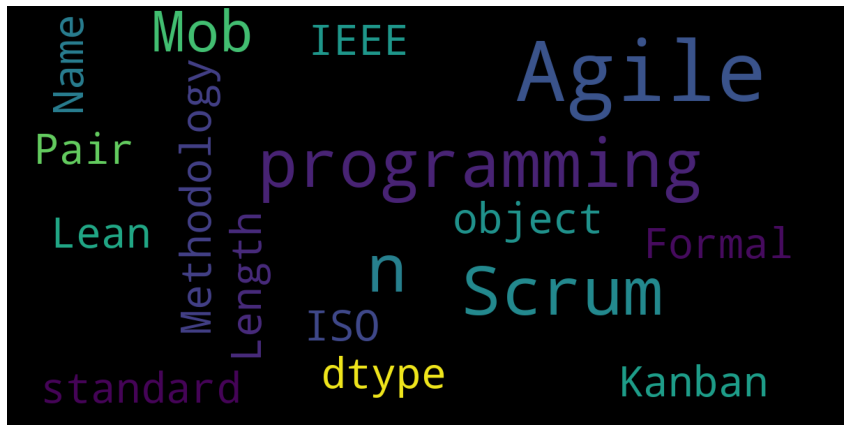

In [74]:
show_wordcloud(text_feats_train['Methodology'])

<h3>Job Description

In [75]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_jb=v_1.fit_transform(text_feats_train['Job Description'])
ty_jbs =v_1.transform(text_feats_test['Job Description'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_jbc=v_1c.fit_transform(text_feats_train['Job Description'])
ty_jbcs =v_1c.transform(text_feats_test['Job Description'])

<h3>Minimum Qual Requirements

In [76]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_mqr=v_1.fit_transform(text_feats_train['Minimum Qual Requirements'])
ty_mqrs =v_1.transform(text_feats_test['Minimum Qual Requirements'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_mqrc=v_1c.fit_transform(text_feats_train['Minimum Qual Requirements'])
ty_mqrcs =v_1c.transform(text_feats_test['Minimum Qual Requirements'])

<h3>Preferred Skills

In [77]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_ps=v_1.fit_transform(text_feats_train['Preferred Skills'])
ty_pss =v_1.transform(text_feats_test['Preferred Skills'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_psc=v_1c.fit_transform(text_feats_train['Preferred Skills'])
ty_pscs =v_1c.transform(text_feats_test['Preferred Skills'])

<h3>Additional Information

In [78]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_ai=v_1.fit_transform(text_feats_train['Additional Information'])
ty_ais =v_1.transform(text_feats_test['Additional Information'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_aic=v_1c.fit_transform(text_feats_train['Additional Information'])
ty_aics =v_1c.transform(text_feats_test['Additional Information'])

<h3>DevType

In [79]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_dt=v_1.fit_transform(text_feats_train['DevType'])
ty_dts =v_1.transform(text_feats_test['DevType'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_dtc=v_1c.fit_transform(text_feats_train['DevType'])
ty_dtcs =v_1c.transform(text_feats_test['DevType'])

<h3>EducationTypes

In [80]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_et=v_1.fit_transform(text_feats_train['EducationTypes'])
ty_ets =v_1.transform(text_feats_test['EducationTypes'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_etc=v_1c.fit_transform(text_feats_train['EducationTypes'])
ty_etcs =v_1c.transform(text_feats_test['EducationTypes'])

<h3>SelfTaughtTypes

In [81]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_stt=v_1.fit_transform(text_feats_train['SelfTaughtTypes'])
ty_stts =v_1.transform(text_feats_test['SelfTaughtTypes'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_sttc=v_1c.fit_transform(text_feats_train['SelfTaughtTypes'])
ty_sttcs =v_1c.transform(text_feats_test['SelfTaughtTypes'])

<h3>Methodology

In [82]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_m=v_1.fit_transform(text_feats_train['Methodology'])
ty_ms =v_1.transform(text_feats_test['Methodology'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_mc=v_1c.fit_transform(text_feats_train['Methodology'])
ty_mcs =v_1c.transform(text_feats_test['Methodology'])

<h3>To Apply

In [83]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_ta=v_1.fit_transform(text_feats_train['To Apply'])
ty_tas =v_1.transform(text_feats_test['To Apply'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_tac=v_1c.fit_transform(text_feats_train['To Apply'])
ty_tacs =v_1c.transform(text_feats_test['To Apply'])

<h3>Residency Requirement

In [84]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_rr=v_1.fit_transform(text_feats_train['Residency Requirement'])
ty_rrs=v_1.transform(text_feats_test['Residency Requirement'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_rrc=v_1c.fit_transform(text_feats_train['Residency Requirement'])
ty_rrcs=v_1c.transform(text_feats_test['Residency Requirement'])

<H3>UpdateCV

In [85]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_ucv=v_1.fit_transform(text_feats_train['UpdateCV'])
ty_ucvs =v_1.transform(text_feats_test['UpdateCV'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_ucvc=v_1.fit_transform(text_feats_train['UpdateCV'])
ty_ucvcs =v_1.transform(text_feats_test['UpdateCV'])

<H3>HopeFiveYears

In [86]:
v_1 = TfidfVectorizer(ngram_range=(1,3),stop_words="english", analyzer='word')
ty_hfy=v_1.fit_transform(text_feats_train['HopeFiveYears'])
ty_hfys =v_1.transform(text_feats_test['HopeFiveYears'])

v_1c = TfidfVectorizer(ngram_range=(2,6),stop_words="english", analyzer='char')
ty_hfyc=v_1c.fit_transform(text_feats_train['HopeFiveYears'])
ty_hfycs =v_1c.transform(text_feats_test['HopeFiveYears'])

In [87]:
df_train.drop(columns=['Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Residency Requirement','DevType','EducationTypes','SelfTaughtTypes','Methodology','UpdateCV','HopeFiveYears'],axis=1,inplace=True)
#df_train.drop(columns=['Hours/Shift'],axis=1,inplace=True)

df_test.drop(columns=['Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information','To Apply','Residency Requirement','DevType','EducationTypes','SelfTaughtTypes','Methodology','UpdateCV','HopeFiveYears'],axis=1,inplace=True)
#df_test.drop(columns=['Hours/Shift'],axis=1,inplace=True)

In [88]:
df_train['earliest_year']=df_train['earliest_cr_line'].str.split('-').str.get(0)
df_train['earliest_month']=df_train['earliest_cr_line'].str.split('-').str.get(1)

df_train['earliest_year'].reset_index(drop=True, inplace=True)
df_train['earliest_month'].reset_index(drop=True, inplace=True)

set=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
count=0
for i in range(len(df_train['earliest_cr_line'])):
    for j in range(len(set)):
        if df_train['earliest_year'][i]==set[j]:
            df_train['earliest_year'][i]=df_train['earliest_month'][i]
            count=count+1
print(count)

<ipython-input-88-62b00098006b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['earliest_year'][i]=df_train['earliest_month'][i]


1265


In [89]:
df_train2=df_train.copy()
df_test2=df_test.copy

In [90]:
df_train.drop(['earliest_month'],axis=1,inplace=True)

In [91]:
df_test['earliest_year']=df_test['earliest_cr_line'].str.split('-').str.get(0)
df_test['earliest_month']=df_test['earliest_cr_line'].str.split('-').str.get(1)

df_test['earliest_year'].reset_index(drop=True, inplace=True)
df_test['earliest_month'].reset_index(drop=True, inplace=True)

set=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
count=0
for i in range(len(df_test['earliest_cr_line'])):
    for j in range(len(set)):
        if df_test['earliest_year'][i]==set[j]:
            df_test['earliest_year'][i]=df_test['earliest_month'][i]
            count=count+1
print(count)

298


<ipython-input-91-c886a4159a35>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['earliest_year'][i]=df_test['earliest_month'][i]


In [92]:
df_test.drop(['earliest_month'],axis=1,inplace=True)

In [93]:
df_train.drop(['earliest_cr_line'],axis=1,inplace=True)
df_test.drop(['earliest_cr_line'],axis=1,inplace=True)

In [94]:
df_train.head()

,id,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,FormalEducation,UndergradMajor,CompanySize,YearsCoding,YearsCodingProf,...,updated month,updated day,process year,process month,process day,last_pymnt_d_mon,last_pymnt_d_day,last_credit_pull_d_day,last_credit_pull_d_mon,earliest_year
1,68356094,28000,0.003608,0.007852,0.001910,PD,other,10,9.0,6.0,...,12.0,12.0,2019.0,12.0,17.0,Aug,18,18,Oct,98
2,68338594,24000,0.000637,0.005730,0.001910,BD,computers,1000,3.0,0.0,...,7.0,3.0,2019.0,12.0,17.0,Sep,16,18,Jul,98
3,67890239,28000,0.000637,0.001486,0.001910,BD,IT,10,3.0,0.0,...,11.0,23.0,2019.0,12.0,17.0,May,17,17,Sep,3
4,67326377,16000,0.000637,0.009762,0.003820,BD,other,1000,3.0,3.0,...,10.0,31.0,2019.0,12.0,17.0,May,17,19,Mar,96
5,68605060,30600,0.000637,0.006579,0.000849,BD,computers,1000,3.0,3.0,...,11.0,21.0,2019.0,12.0,17.0,Oct,16,17,Apr,4


In [95]:
df_train['earliest_year']=df_train['earliest_year'].astype('int64')
df_test['earliest_year']=df_test['earliest_year'].astype('int64')

In [96]:
df_train.drop(['last_pymnt_amnt'],axis=1,inplace=True)
df_test.drop(['last_pymnt_amnt'],axis=1,inplace=True)

In [97]:
df_train.shape,df_test.shape

((2355, 58), (588, 58))

In [98]:
numerical_features=df_train.select_dtypes(include=np.number)
categorical_features=df_train.select_dtypes(include=np.object)

In [99]:
categorical_features.columns

Index(['FormalEducation', 'UndergradMajor', 'JobSearchStatus',
       'CommunicationTools', 'AgreeDisagree1', 'AgreeDisagree2',
       'AgreeDisagree3', 'FrameworkWorkedWith', 'OperatingSystem',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'loan_status', 'purpose', 'title',
       'addr_state', 'last_pymnt_d_mon', 'last_credit_pull_d_mon'],
      dtype='object')

<h3>EXPLORATORY DATA ANALYSIS TO CREATE NEW FEATURES OR TO REMOVE FEATURES THAT HAS NO IMPACT

<h3>Let's work with  Numeric features

In [100]:
numerical_features.isnull().sum().sum()

0

In [101]:
numerical_features.columns

Index(['id', 'LOAN_AMT', 'Business Title', 'Civil Service Title',
       'Division/Work Unit', 'CompanySize', 'YearsCoding', 'YearsCodingProf',
       'LastNewJob', 'TimeFullyProductive', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkDesireNextYear', 'IDE', 'Age',
       'term', 'emp_length', 'zip_code', 'dti', 'Target A', 'Target B',
       'Posting year', 'Posting month', 'Posting day', 'updated year',
       'updated month', 'updated day', 'process year', 'process month',
       'process day', 'last_pymnt_d_day', 'last_credit_pull_d_day',
       'earliest_year'],
      dtype='object')

In [102]:
encode_feats=['Business Title', 'Civil Service Title',
       'Division/Work Unit','LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkDesireNextYear', 'IDE']
numerical_features=numerical_features.drop(encode_feats,axis=1)

In [103]:
numerical_features

,id,LOAN_AMT,CompanySize,YearsCoding,YearsCodingProf,LastNewJob,TimeFullyProductive,Age,term,emp_length,...,Posting day,updated year,updated month,updated day,process year,process month,process day,last_pymnt_d_day,last_credit_pull_d_day,earliest_year
1,68356094,28000,10,9.0,6.0,1.0,0.0,34.0,36,6.0,...,15.0,2019.0,12.0,12.0,2019.0,12.0,17.0,18,18,98
2,68338594,24000,1000,3.0,0.0,1.0,0.0,34.0,60,6.0,...,3.0,2018.0,7.0,3.0,2019.0,12.0,17.0,16,18,98
3,67890239,28000,10,3.0,0.0,1.0,0.0,24.0,60,5.0,...,30.0,2019.0,11.0,23.0,2019.0,12.0,17.0,17,17,3
4,67326377,16000,1000,3.0,3.0,0.5,1.0,24.0,36,2.0,...,31.0,2019.0,10.0,31.0,2019.0,12.0,17.0,17,19,96
5,68605060,30600,1000,3.0,3.0,0.5,1.0,34.0,60,5.0,...,21.0,2019.0,11.0,21.0,2019.0,12.0,17.0,16,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,68526718,6000,0,6.0,3.0,0.5,1.0,34.0,36,6.0,...,12.0,2017.0,10.0,12.0,2019.0,12.0,17.0,18,19,5
2352,68465485,28000,20,3.0,3.0,2.0,0.0,34.0,60,10.0,...,12.0,2019.0,9.0,12.0,2019.0,12.0,17.0,18,18,3
2353,68425382,21000,20,3.0,3.0,2.0,1.0,34.0,60,1.0,...,11.0,2019.0,10.0,11.0,2019.0,12.0,17.0,17,19,94
2354,68485805,8000,100,3.0,0.0,0.5,3.0,24.0,36,2.0,...,21.0,2019.0,12.0,16.0,2019.0,12.0,17.0,16,17,11


In [104]:
numerical_features.iloc[:,:26].describe()

,id,LOAN_AMT,CompanySize,YearsCoding,YearsCodingProf,LastNewJob,TimeFullyProductive,Age,term,emp_length,...,Posting day,updated year,updated month,updated day,process year,process month,process day,last_pymnt_d_day,last_credit_pull_d_day,earliest_year
count,2.355000e+03,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,2355.000000,...,2355.000000,2355.000000,2355.000000,2355.000000,2355.0,2355.0,2355.0,2355.000000,2355.000000,2355.000000
mean,6.829948e+07,15383.375796,1639.622081,8.901911,5.443312,1.522081,1.306157,34.704034,43.307006,6.055626,...,16.319745,2018.581741,9.068790,15.568577,2019.0,12.0,17.0,17.652229,18.327389,45.971550
std,2.018150e+06,8701.768128,3366.162217,7.246431,6.052629,1.218634,1.646843,6.864532,11.046612,3.535457,...,9.036559,0.947880,2.956845,8.897359,0.0,0.0,0.0,1.076547,0.851453,44.351138
min,3.617740e+05,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,36.000000,1.000000,...,1.000000,2011.000000,1.000000,1.000000,2019.0,12.0,17.0,16.000000,15.000000,0.000000
25%,6.837669e+07,8837.500000,20.000000,3.000000,3.000000,0.500000,1.000000,34.000000,36.000000,3.000000,...,9.000000,2019.000000,7.000000,8.000000,2019.0,12.0,17.0,17.000000,18.000000,3.000000
50%,6.846527e+07,14225.000000,100.000000,6.000000,3.000000,1.000000,1.000000,34.000000,36.000000,6.000000,...,16.000000,2019.000000,10.000000,15.000000,2019.0,12.0,17.0,18.000000,19.000000,11.000000
75%,6.854338e+07,20550.000000,1000.000000,12.000000,6.000000,2.000000,1.000000,34.000000,60.000000,10.000000,...,24.000000,2019.000000,11.000000,24.000000,2019.0,12.0,17.0,19.000000,19.000000,94.000000
max,6.861706e+07,35000.000000,10000.000000,30.000000,30.000000,4.000000,12.000000,64.000000,60.000000,10.000000,...,31.000000,2019.000000,12.000000,31.000000,2019.0,12.0,17.0,19.000000,19.000000,99.000000


In [105]:
#skewness & kurtosis
pd.DataFrame({"skewness":numerical_features.skew(),"kurtosis":numerical_features.kurt()})

,skewness,kurtosis
id,-32.224626,1080.081456
LOAN_AMT,0.568100,-0.473943
CompanySize,1.964057,2.054513
YearsCoding,1.183036,0.973560
YearsCodingProf,1.902523,3.876883
LastNewJob,1.208997,0.034053
TimeFullyProductive,3.263384,13.815698
Age,1.116223,3.142858
term,0.850393,-1.277917
emp_length,-0.144063,-1.579908


<h4>If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric

In [106]:
len(numerical_features.columns.to_list())

26

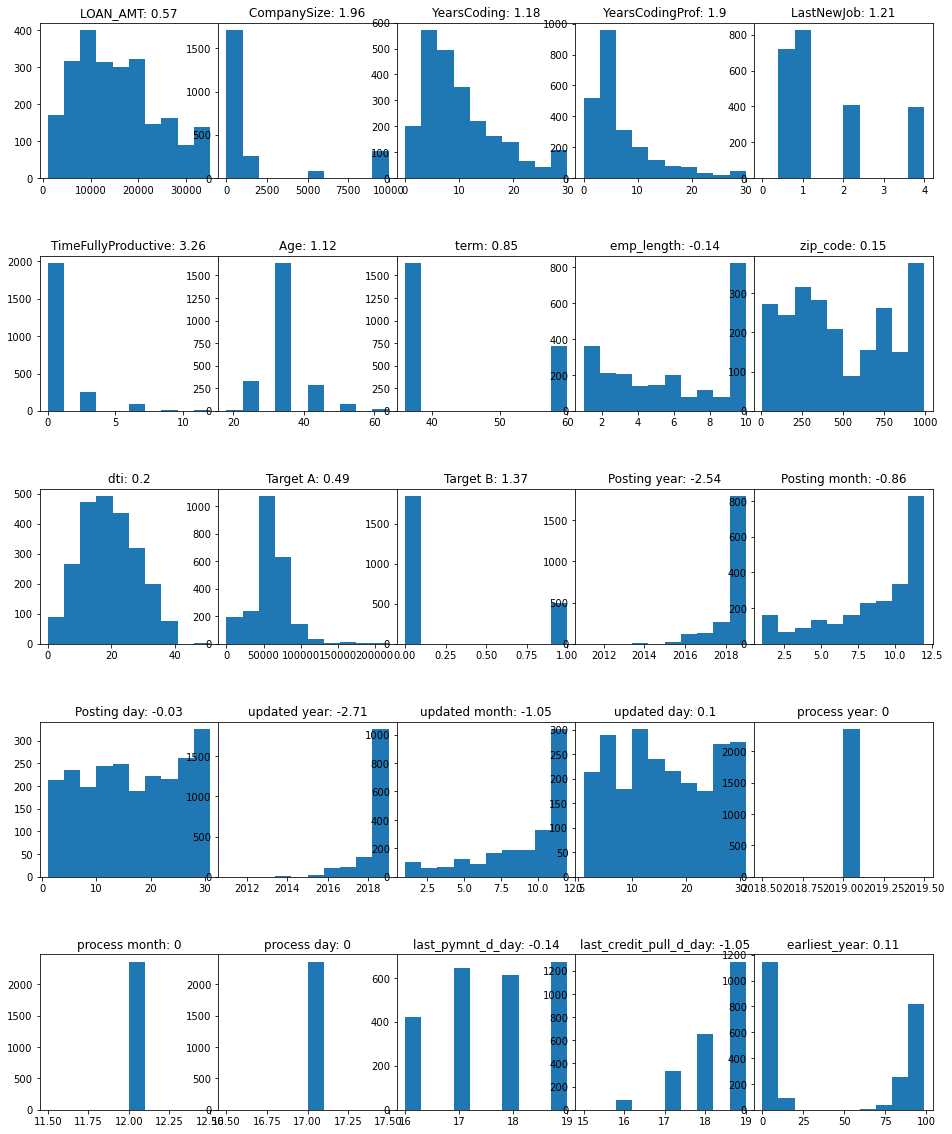

In [691]:
fig, axs = plt.subplots(5,5, figsize=(16, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >2],range(26)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2)))

<h3><ul>
    <li>LOAN_AMT is Normally Distibuted</li><br>
    <li>DTI is normally distributed</li><br>
    <li>last_pymnt_amnt is right skewed</li><br>
    <li>Target A is Normally distributed</li><br>
    <li>Target B is Moderately right skewed (More examples with Zero response)</li><br>
    <li>yearscoding is Moderately right skewed</li><br>
    <li>yearscodingprof is Moderately right skewed</li><br>
    <li>updatedmonth is Moderately left skewed</li>

In [692]:
numerical_features['Target B'].value_counts()

0    1844
1     511
Name: Target B, dtype: int64

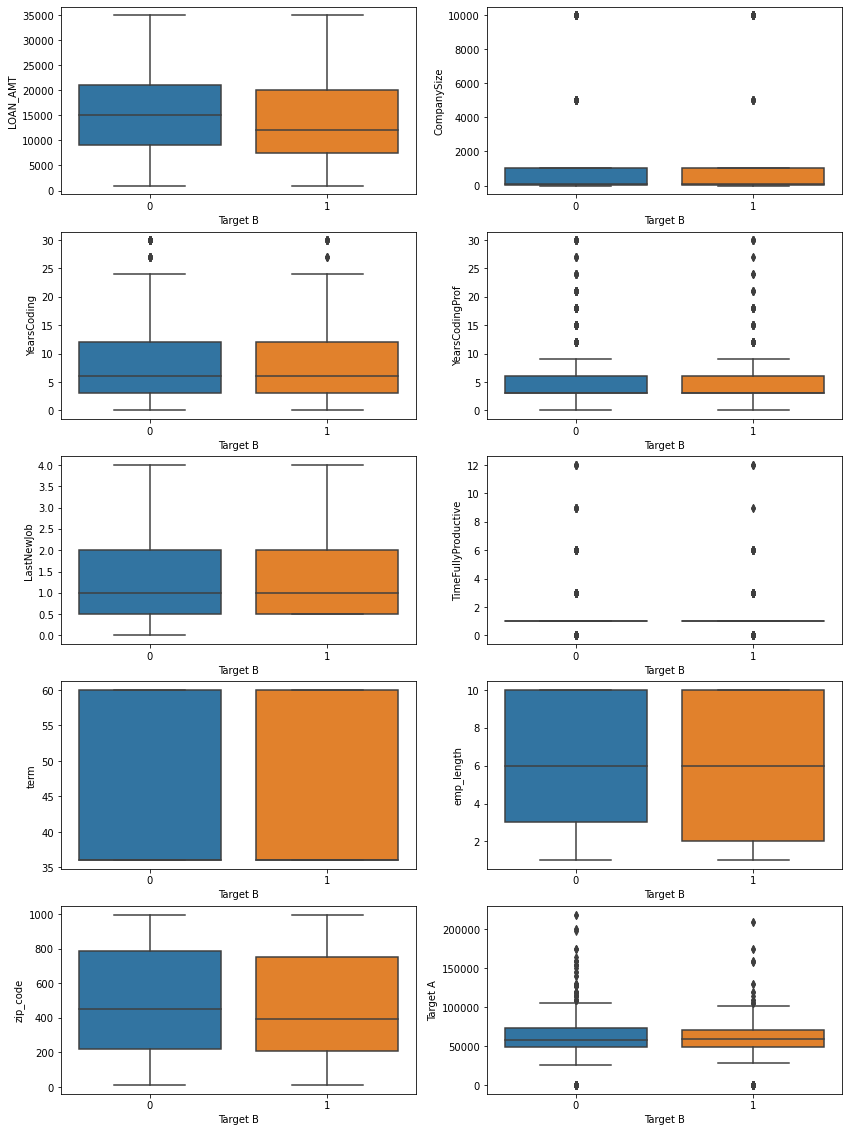

In [693]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i)>3],AX):
    sns.boxplot(x='Target B',y=i,data=numerical_features,ax=j)

<h3>Less laon_amt more chances of target b being 1
    no significant relation other thing are showing

<AxesSubplot:>

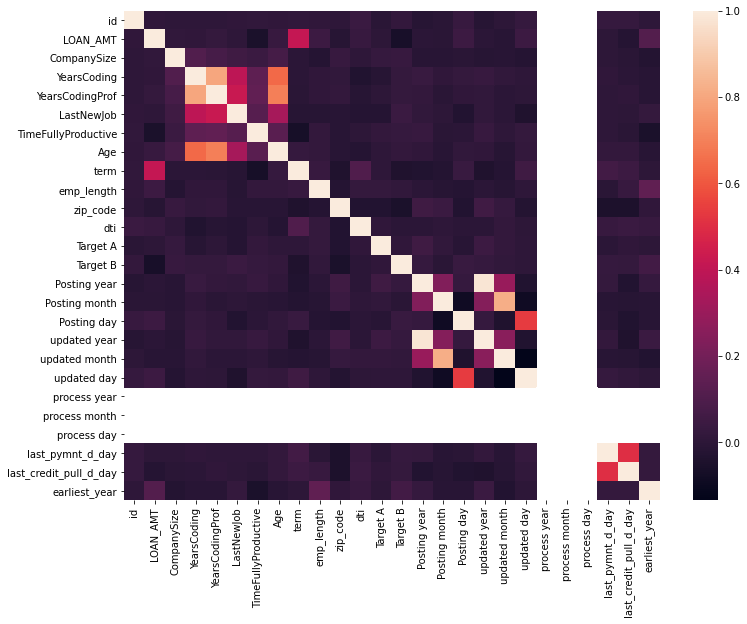

In [694]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

In [695]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,1.005679,id
1,1.238909,LOAN_AMT
2,1.020495,CompanySize
3,2.932085,YearsCoding
4,3.397725,YearsCodingProf
5,1.249645,LastNewJob
6,1.042878,TimeFullyProductive
7,2.036736,Age
8,1.239956,term
9,1.030722,emp_length


<h3>categorical_features

In [696]:
categorical_features.shape, categorical_features.columns

((2355, 21),
 Index(['FormalEducation', 'UndergradMajor', 'JobSearchStatus',
        'CommunicationTools', 'AgreeDisagree1', 'AgreeDisagree2',
        'AgreeDisagree3', 'FrameworkWorkedWith', 'OperatingSystem',
        'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
        'AIResponsible', 'AIFuture', 'loan_status', 'purpose', 'title',
        'addr_state', 'last_pymnt_d_mon', 'last_credit_pull_d_mon'],
       dtype='object'))

In [697]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for FormalEducation 10
Value Counts for FormalEducation 
 BD     1160
MD      578
CU      246
SS      143
AD       69
DD       62
n/a      43
PD       34
PE       12
NO        8
Name: FormalEducation, dtype: int64 

Total unique values for UndergradMajor 11
Value Counts for UndergradMajor 
 computers     1415
n/a            258
IT             193
other          161
science         96
maths           65
business        54
humanities      34
social          31
arts            31
others          17
Name: UndergradMajor, dtype: int64 

Total unique values for JobSearchStatus 3
Value Counts for JobSearchStatus 
 deactive    1436
No           608
active       311
Name: JobSearchStatus, dtype: int64 

Total unique values for CommunicationTools 11
Value Counts for CommunicationTools 
 Confluence                                                            716
Office                                                                401
Google Hangouts                             

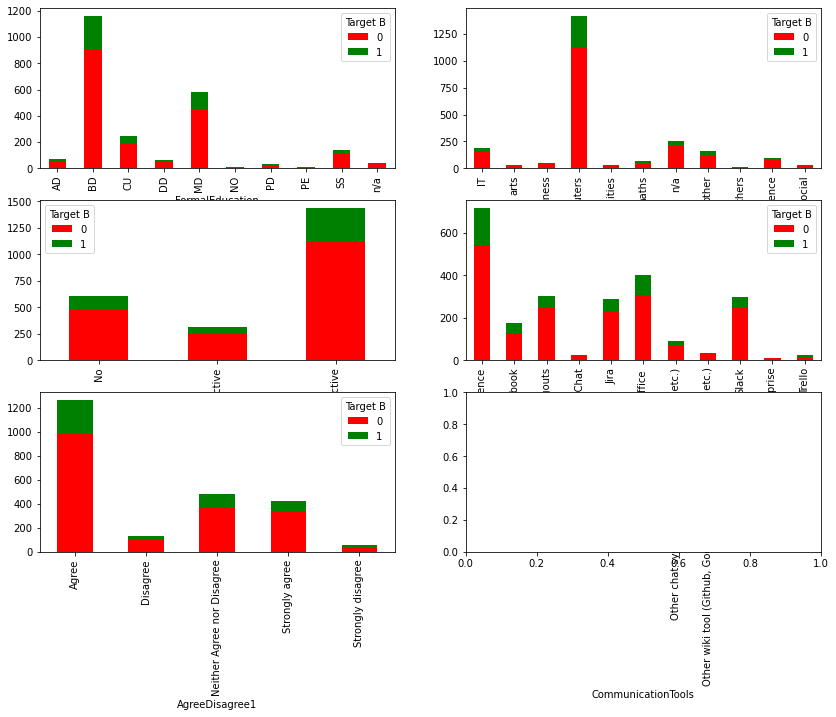

In [698]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
AX = [ax1, ax2, ax3, ax4, ax5]

for i,j in zip(categorical_features.columns.to_list(),AX):
    temp = pd.crosstab(df_train[i],df_train['Target B'])
    temp.plot(kind='bar',stacked=True,color=['red','green'],grid=False,ax=j)

In [699]:
for i in categorical_features.columns.to_list():
    print(pd.crosstab(df_train[i],df_train['Target B']))

Target B           0    1
FormalEducation          
AD                52   17
BD               908  252
CU               188   58
DD                49   13
MD               450  128
NO                 7    1
PD                29    5
PE                 9    3
SS               120   23
n/a               32   11
Target B           0    1
UndergradMajor           
IT               153   40
arts              30    1
business          44   10
computers       1114  301
humanities        26    8
maths             52   13
n/a              207   51
other            114   47
others            12    5
science           73   23
social            19   12
Target B            0    1
JobSearchStatus           
No                476  132
active            246   65
deactive         1122  314
Target B                                              0    1
CommunicationTools                                          
Confluence                                          544  172
Facebook                        

Target B is 1 when:
<li>FormalEducation is Bachelores degree(BD) or Masters Degree(MD)</li>
<li>UndergradMajor is Computers</li>
<li>Job search status is deactive</li>
<li>Communication tools is confluency or office</li>
<li>AgreeDisagree1 is agree or Neither Agree nor Disagree </li>
<li>AgreeDisagree2 is Agree or Disagree or Neither Agree nor Disagree</li>
<li>AgreeDisagree3 is Disagree or Neither Agree nor Disagree</li>
<li>FrameworkWorkedWith is web</li>
<li>OperatingSystem is windows or macOS</li>
<li>Version control is git</li>
<li>CheckIn code is Multiple times per day</li>
<li>Loan status Fully Paid</li>
<li>Purpose debt_consolidation</li>
<li>title is Debt consolidation</li>
<li>last_pymnt_d_mon is Ja</li>
<li>last_credit_pull_d_mon is Mar<li>

In [101]:
df_train['FormalEducationNew'] = df_train['FormalEducation'].apply(lambda x:1if (x=='BD') or (x=='MD') else 0)
df_train['UndergradMajor_new'] = df_train['UndergradMajor'].apply(lambda x: 1 if (x == 'computers') else 0)
df_train['JobSearchStatusNew'] = df_train['JobSearchStatus'].apply(lambda x:1if (x=='deactive')else 0)
df_train['CommunicationTools_new'] = df_train['CommunicationTools'].apply(lambda x: 1 if (x == 'Confluence') or (x=='office') else 0)
df_train['AgreeDisagree1New'] = df_train['AgreeDisagree1'].apply(lambda x:1 if (x=='Agree') or (x=='Neither Agree nor Disagree') else 0)
df_train['AgreeDisagree2_new'] = df_train['AgreeDisagree2'].apply(lambda x: 1 if (x == 'Agree') or (x=='Disagree or Neither Agree nor Disagree') else 0)
df_train['AgreeDisagree3New'] = df_train['AgreeDisagree3'].apply(lambda x:1 if (x == 'Disagree') or (x=='Disagree or Neither Agree nor Disagree') else 0)
df_train['FrameworkWorkedWith_new'] = df_train['FrameworkWorkedWith'].apply(lambda x: 1 if (x == 'web') else 0)
df_train['OperatingSystemNew'] = df_train['OperatingSystem'].apply(lambda x:1if (x=='Windows') or (x=='MacOS') else 0)
df_train['VersionControl_new'] = df_train['VersionControl'].apply(lambda x: 1 if (x == 'Git') else 0)
df_train['CheckInCodeNew'] = df_train['CheckInCode'].apply(lambda x:1if (x=='Multiple times per day') else 0)
df_train['loan_status_new'] = df_train['loan_status'].apply(lambda x: 1 if (x == 'Fully Paid') else 0)
df_train['purpose_new'] = df_train['purpose'].apply(lambda x: 1 if (x == 'debt_consolidation') else 0)
df_train['titleNew'] = df_train['title'].apply(lambda x:1if (x=='Debt consolidation') else 0)
df_train['last_pymnt_d_mon_new'] = df_train['last_pymnt_d_mon'].apply(lambda x: 1 if (x == 'Jan') else 0)
df_train['last_credit_pull_d_mon_new'] = df_train['last_credit_pull_d_mon'].apply(lambda x: 1 if (x == 'Mar') else 0)

In [102]:
df_test['FormalEducationNew'] = df_test['FormalEducation'].apply(lambda x:1if (x=='BD') or (x=='MD') else 0)
df_test['UndergradMajor_new'] = df_test['UndergradMajor'].apply(lambda x: 1 if (x == 'computers') else 0)
df_test['JobSearchStatusNew'] = df_test['JobSearchStatus'].apply(lambda x:1if (x=='deactive')else 0)
df_test['CommunicationTools_new'] = df_test['CommunicationTools'].apply(lambda x: 1 if (x == 'Confluence') or (x=='office') else 0)
df_test['AgreeDisagree1New'] = df_test['AgreeDisagree1'].apply(lambda x:1 if (x=='Agree') or (x=='Neither Agree nor Disagree') else 0)
df_test['AgreeDisagree2_new'] = df_test['AgreeDisagree2'].apply(lambda x: 1 if (x == 'Agree') or (x=='Disagree or Neither Agree nor Disagree') else 0)
df_test['AgreeDisagree3New'] = df_test['AgreeDisagree3'].apply(lambda x:1 if (x == 'Disagree') or (x=='Disagree or Neither Agree nor Disagree') else 0)
df_test['FrameworkWorkedWith_new'] = df_test['FrameworkWorkedWith'].apply(lambda x: 1 if (x == 'web') else 0)
df_test['OperatingSystemNew'] = df_test['OperatingSystem'].apply(lambda x:1if (x=='Windows') or (x=='MacOS') else 0)
df_test['VersionControl_new'] = df_test['VersionControl'].apply(lambda x: 1 if (x == 'Git') else 0)
df_test['CheckInCodeNew'] = df_test['CheckInCode'].apply(lambda x:1if (x=='Multiple times per day') else 0)
df_test['loan_status_new'] = df_test['loan_status'].apply(lambda x: 1 if (x == 'Fully Paid') else 0)
df_test['purpose_new'] = df_test['purpose'].apply(lambda x: 1 if (x == 'debt_consolidation') else 0)
df_test['titleNew'] = df_test['title'].apply(lambda x:1if (x=='Debt consolidation') else 0)
df_test['last_pymnt_d_mon_new'] = df_test['last_pymnt_d_mon'].apply(lambda x: 1 if (x == 'Jan') else 0)
df_test['last_credit_pull_d_mon_new'] = df_test['last_credit_pull_d_mon'].apply(lambda x: 1 if (x == 'Mar') else 0)

In [103]:
df_train.shape,df_test.shape

((2355, 74), (588, 74))

In [104]:
from sklearn.preprocessing import LabelEncoder
x=['FormalEducation', 'UndergradMajor', 'JobSearchStatus',
        'CommunicationTools', 'AgreeDisagree1', 'AgreeDisagree2',
        'AgreeDisagree3', 'FrameworkWorkedWith', 'OperatingSystem',
        'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
        'AIResponsible', 'AIFuture', 'loan_status', 'purpose', 'title',
        'addr_state', 'last_pymnt_d_mon', 'last_credit_pull_d_mon']
for i in x:
  le = LabelEncoder()
  df_train[i] = le.fit_transform(df_train[i])
  df_train[i]=df_train[i]+1
  df_test[i] = le.fit_transform(df_test[i])
  df_test[i]=df_test[i]+1


In [105]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(0.01)
selector.fit(df_train)
print(selector.get_support())

[ True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [106]:
constant_columns=[column for column in df_train.columns if column not in df_train.columns[selector.get_support()]]
print(constant_columns)

['Business Title', 'Civil Service Title', 'Division/Work Unit', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkDesireNextYear', 'IDE', 'process year', 'process month', 'process day']


In [107]:
df_train.drop(constant_columns,axis=1,inplace=True)
df_test.drop(constant_columns,axis=1,inplace=True)

In [108]:
def correlation(dataset, threshold):
    set=[]  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                set.append(colname)
    return set
cols=correlation(df_train,0.8)
len(cols)

6

In [109]:
cols

['updated year',
 'updated month',
 'JobSearchStatusNew',
 'OperatingSystemNew',
 'loan_status_new',
 'titleNew']

In [110]:
df_train.drop(cols,axis=1,inplace=True)
df_test.drop(cols,axis=1,inplace=True)

In [111]:
df_train.shape,df_test.shape

((2355, 54), (588, 54))

In [112]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [113]:
df_train.drop(['AIInteresting'],axis=1,inplace=True)
df_test.drop(['AIInteresting'],axis=1,inplace=True)

In [114]:
df_train.drop(['id'],axis=1,inplace=True)
df_test.drop(['id'],axis=1,inplace=True)

In [115]:
df_train['Std'] = df_train.std(axis=1).round(2)
df_train['quantile1'] = df_train.quantile(q=0.01,axis=1).round(2)
df_train['quantile3'] = df_train.quantile(q=0.25,axis=1).round(2)
df_train['quantile5'] = df_train.quantile(q=0.50,axis=1).round(2)                                              
df_train['Mean'] = df_train.mean(axis=1).round(2)

In [116]:
#df_test
df_test['Std'] = df_test.std(axis=1).round(2)
df_test['quantile1'] = df_test.quantile(q=0.01,axis=1).round(2)
df_test['quantile3'] = df_test.quantile(q=0.25,axis=1).round(2)
df_test['quantile5'] = df_test.quantile(q=0.50,axis=1).round(2)                                              
df_test['Mean'] = df_test.mean(axis=1).round(2)

<h3>TARGET A

In [117]:
df_train3=df_train.drop(['Target A'],axis=1)
rmse_preds=df_test[['Target A','Target B']]
df_test3=df_test.drop(['Target A'],axis=1)

In [118]:
final_train = sparse.hstack((df_train3,ty_jb,ty_jbc,ty_mqr,ty_mqrc,ty_ps,ty_psc,ty_ai,ty_aic,ty_dt,ty_dtc,ty_et,ty_etc,ty_stt,ty_sttc,ty_m,ty_mc,ty_ta,ty_tac,ty_rr,ty_rrc,ty_ucv,ty_ucvc,ty_hfy,ty_hfyc)).tocsr()
final_test = sparse.hstack((df_test3,ty_jbs,ty_jbcs,ty_mqrs,ty_mqrcs,ty_pss,ty_pscs,ty_ais,ty_aics,ty_dts,ty_dtcs,ty_ets,ty_etcs,ty_stts,ty_sttcs,ty_ms,ty_mcs,ty_tas,ty_tacs,ty_rrs,ty_rrcs,ty_ucvs,ty_ucvcs,ty_hfys,ty_hfycs)).tocsr()

<h3>Target B

In [119]:
df_train4=df_train.drop(['Target B'],axis=1)
rmse_preds=df_test[['Target A','Target B']]
df_test4=df_test.drop(['Target B'],axis=1)

In [120]:
final_train2 = sparse.hstack((df_train4,ty_jb,ty_jbc,ty_mqr,ty_mqrc,ty_ps,ty_psc,ty_ai,ty_aic,ty_dt,ty_dtc,ty_et,ty_etc,ty_stt,ty_sttc,ty_m,ty_mc,ty_ta,ty_tac,ty_rr,ty_rrc,ty_ucv,ty_ucvc,ty_hfy,ty_hfyc)).tocsr()
final_test2 = sparse.hstack((df_test4,ty_jbs,ty_jbcs,ty_mqrs,ty_mqrcs,ty_pss,ty_pscs,ty_ais,ty_aics,ty_dts,ty_dtcs,ty_ets,ty_etcs,ty_stts,ty_sttcs,ty_ms,ty_mcs,ty_tas,ty_tacs,ty_rrs,ty_rrcs,ty_ucvs,ty_ucvcs,ty_hfys,ty_hfycs)).tocsr()

In [121]:
df_train4.shape,df_test4.shape

((2355, 56), (588, 56))

In [122]:
from sklearn.metrics import mean_squared_error
import math

In [123]:
target=df_train['Target A']
target2=df_train['Target B']

In [124]:
X_trn, X_val, y_trn, y_val = train_test_split(final_train, target, test_size=0.05, random_state=121)
X_test = final_test

In [125]:
X_trn2, X_val2, y_trn2, y_val2 = train_test_split(final_train2, target2, test_size=0.05, random_state=121)
X_test2 = final_test2

<h3>Light GBM

In [126]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
def learning_rate_010_decay_power_0995(current_iter): 
    base_learning_rate = 0.0009
    lr = base_learning_rate * np.power(.995, current_iter) 
    return lr if lr > 1e-4 else 1e-4

In [129]:
import lightgbm as lgb
train_data = lgb.Dataset(X_trn, label=y_trn)
test_data = lgb.Dataset(X_val, label=y_val)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 3000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 1000
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_val)
print('RMSE:', math.sqrt((mean_squared_error((y_val), (y_pred_lgbm)))))

C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 6.891061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7185911
[LightGBM] [Info] Number of data points in the train set: 2237, number of used features: 251244
[LightGBM] [Info] Start training from score 58852.892570
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 1484.74
[200]	valid_0's rmse: 1122.18
[300]	valid_0's rmse: 1054.9
[400]	valid_0's rmse: 1043.37
[500]	valid_0's rmse: 1041.91
[600]	valid_0's rmse: 1041.63
[700]	valid_0's rmse: 1041.57
Early stopping, best iteration is:
[554]	valid_0's rmse: 1041.33
RMSE: 1041.329647387242


In [146]:
preds=lgbm.predict(final_test)
ytest33=rmse_preds['Target A']
print(math.sqrt(mean_squared_error(ytest33,preds)))

1507.0416533156351


In [2]:
from sklearn.metrics import f1_score
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [ ]:
print('F1 score:', lgb_f1_score((y_val2), (y_pred_lgbm2)))

In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(#loss_function='CrossEntropy', 
                         eval_metric='F1', 
                         #classes_count=2,
                         depth=3,
                         random_seed=121, 
                         iterations=1000, 
                         learning_rate=0.4,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         border_count=100,
                         od_wait=500)
cat.fit(X_trn2, y_trn2, verbose=100,
        use_best_model=True,
        eval_set=[(X_trn2, y_trn2),(X_val2, y_val2)],
        plot=False)
predictions = cat.predict(X_val2)
print('f1 score:', f1_score(y_val2, predictions))

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(verbose=100,boosting_type='gbdt',n_estimators=1000,depth=10,learning_rate=.01,
                       objective='binary',is_unbalance=True,colsample_bytree=0.3,reg_lambda=0,
                       reg_alpha=0,min_gain_to_split=0,random_state=121,n_jobs=-1,num_leaves = 250,num_trees = 500,num_threads = 16,
                       min_data_in_leaf = 0,min_sum_hessian_in_leaf = 0,max_bin=200) 
clf = model.fit(final_train2,target2)

C:\Users\DELL\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] num_threads is set=16, n_jobs=-1 will be ignored. Current value: num_threads=16
[LightGBM] [Warning] num_iterations is set=500, num_trees=500 will be ignored. Current value: num_iterations=500
[LightGBM] [Warning] Cannot set both min_data_in_leaf and min_sum_hessian_in_leaf to 0. Will set min_data_in_leaf to 1.
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] min_data_in_leaf is set=0, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=0
[LightGBM] [Warning] min_gain_to_split is set=0, min_split_gain=0.0 will be ig

In [135]:
predsb=lgbm2.predict(final_test2)
from sklearn.metrics import f1_score
f1_score(rmse_preds['Target B'], predsb, average='weighted')

NameError: name 'lgbm2' is not defined

In [ ]:
from catboost import CatBoostRegressor
X=final_train
y=target

errmain=[]
y_pred_main=[]

#For Stacking
cb_train_res = pd.DataFrame()
cb_test_res = pd.DataFrame()

i=0
from sklearn.model_selection import KFold,StratifiedKFold
fold=KFold(n_splits=4,shuffle=True,random_state=121)
for train_index, test_index in fold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    depth = 5
    rf=CatBoostRegressor(n_estimators=2000,eval_metric='RMSE',learning_rate=0.005,max_depth=depth)
    rf.fit(X_train,y_train,eval_set=[(X_test, y_test.values)],
           verbose=200,
           early_stopping_rounds=50
          )
    pr=rf.predict(X_test)
    print("errmain: ",np.sqrt(mean_squared_error((y_test.values),(pr))))
    
    errmain.append(np.sqrt(mean_squared_error((y_test.values),(pr))))
    pp = rf.predict(final_test)
    print(pp.shape)
    y_pred_main.append(pp)
    
    cb_train_res["iteration_"+str(i)] = rf.predict(X)
    cb_test_res["iteration_"+str(i)] = rf.predict(final_test)
    i=i+1

In [ ]:
np.mean(y_pred_main,0)

In [ ]:
def target_encoder(df, column, target, index=None, method='mean'):
    index = df.index if index is None else index # Encode the entire input df if no specific indices is supplied

    if method == 'mean':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].mean())
    elif method == 'median':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].median())
    elif method == 'std':
        encoded_column = df[column].map(df.iloc[index].groupby(column)[target].std())
    else:
        raise ValueError("Incorrect method supplied: '{}'. Must be one of 'mean', 'median', 'std'".format(method))

    return encoded_column

In [ ]:
def smoothing_target_encoder(df, column, target, weight=100):
   
    
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the 'smoothed' means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    return df[column].map(smooth)